# Full Name: Çağdaş Güven

# Student ID: 2738938

# Try to Tell Apples, Oranges and else apart

Images for this assignment are provided at github and they will be automatically downloaded right after imports. When the files are unzip there should be a folder:  ```AppleOrange```.
These are sample images, you can test with more if you want. While testing just for fun, I can try other stuff as well.

Your objective is to convert <font color="magenta"> **Apples to magenta** </font>, <font color="blue"> **Oranges to Blue** </font> , end blur everything else! While changing color, try to keep the original shading (i.e. try not provide a flat single color if possible, keep the shadings to the best you can).  

<font color="red">Do not be **too picky** and lose too much time</font>. Variety of images are provided so that you get the idea that generalizable / perfect filters are not easy to build. Yet your function is expected to work on more than one image at an acceptable level.  

By the same token, you can use the ```fakes```, also for for fun to see how your algorighm works on unrealted images, and why a general filter is not that easy...  

At the end as usual you are expected to **clear all outputs** and then save this file as **Week10_student_id.ipynb** and upload to the assignment at [ODTU Class](https://odtuclass2024f.metu.edu.tr/mod/assign/view.php?id=100364).  


# imports as usual
You are only allowed to use concepts related to what we have seen in class and use only the following imports. You can import sub-libraries with new names etc. but NO NEW LIBRARIES

In [1]:
# not that all of them are necessary, but you are not allowed to import any new library
# yet as before, you can import sub libraries: i.e.:
#       from skimage import measure
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as pimg # check this out this is new
from numpy import cos, arccos, sin, pi, round
from numpy.linalg import matrix_rank as rank
from numpy.linalg import svd, eig
from scipy.linalg import orth
import cv2 as cv
from PIL import Image # good old pillow
import sklearn as skl # famous sci-kit learn
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle
from skimage.exposure import histogram
import skimage as ski # equally famous sci-kit image
!rm bug_numpy_utils.py 2>/dev/null  # at the first run file does not exits but error should print
!wget https://raw.githubusercontent.com/bugrakoku/bug_python_utils/main/bug_numpy_utils.py
from bug_numpy_utils import MatPrint, CData, text2mat # note that once these files are downloaded you can read their content.
!rm me536utils.py 2>/dev/null  # at the first run file does not exits but error should print
!wget https://raw.githubusercontent.com/bugrakoku/bug_python_utils/main/me536utils.py
from me536utils import RotMat

--2024-12-15 22:43:53--  https://raw.githubusercontent.com/bugrakoku/bug_python_utils/main/bug_numpy_utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18456 (18K) [text/plain]
Saving to: ‘bug_numpy_utils.py’

bug_numpy_utils.py  100%[===================>]  18.02K  --.-KB/s    in 0.008s  

2024-12-15 22:43:54 (2.08 MB/s) - ‘bug_numpy_utils.py’ saved [18456/18456]

--2024-12-15 22:43:54--  https://raw.githubusercontent.com/bugrakoku/bug_python_utils/main/me536utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3130 (3.1K

## get images


In [2]:
# !rm AppleOrange.zip 2>/dev/null # just in case
# !wget https://github.com/bugrakoku/data4all/raw/main/AppleOrange.zip # get the zip file
# !unzip AppleOrange.zip

# Get prepared
Below you can check images, perform tests runs, find critical color values etc.  
Leave all your preparation code so that I can see how you have reached the final implementation of the function. This part I will NOT run for evaluation! I will only run the ```AorO()``` and ```AorO2()``` functions in my tests!  

You can add as many code and text cells as you like below. But at the end, as I said above, I will just call the ```AorO()``` or ```AorO2()``` function.  
And please **DO CLEAR ALL OUTPUTS**!

Recall that you are not restricted to <font color="red">R</font>
<font color="green">G</font>
<font color="blue">B</font> at all!

# Part I: Manual threshold determination.
You can determine as many thresholds as you like.  


### Add explanations of what you do and why regarding the code(s) below

In [3]:
# your prep code

import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

def plot_hsv_histogram(img_path):
    # Load image
    img_read_BGR = cv.imread(img_path)
    img_read_RGB = cv.cvtColor(img_read_BGR, cv.COLOR_BGR2RGB)  # Convert BGR to RGB
    img_read_HSV = cv.cvtColor(img_read_BGR, cv.COLOR_BGR2HSV)  # Convert BGR to HSV

    # Separate the H, S, and V channels
    H, S, V = cv.split(img_read_HSV)

    # Plot histograms
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 4, 1)
    plt.hist(H.ravel(), bins=180, range=[0, 179], color='orange', alpha=0.7)
    plt.title('Hue Histogram')
    plt.xlabel('Hue (0-179)')
    plt.ylabel('Frequency')

    plt.subplot(1, 4, 2)
    plt.hist(S.ravel(), bins=256, range=[0, 255], color='green', alpha=0.7)
    plt.title('Saturation Histogram')
    plt.xlabel('Saturation (0-255)')
    plt.ylabel('Frequency')

    plt.subplot(1, 4, 3)
    plt.hist(V.ravel(), bins=256, range=[0, 255], color='blue', alpha=0.7)
    plt.title('Value Histogram')
    plt.xlabel('Value (0-255)')
    plt.ylabel('Frequency')

    plt.subplot(1, 4, 4)
    plt.imshow(img_read_RGB)
    plt.title('Original Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()


def plot_RGB_histogram(image_path):
    """
    Reads an image from the given path and plots histograms for R, G, and B channels.
    Args:
        image_path: Path to the image file.
    """
    # Load the image
    img_read_BGR = cv.imread(image_path)
    img_read_RGB = cv.cvtColor(img_read_BGR, cv.COLOR_BGR2RGB)  # Convert to RGB for consistent color channels

    # Split into R, G, B channels
    R, G, B = cv.split(img_read_RGB)

    # Plot histograms
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 4, 1)
    plt.hist(R.ravel(), bins=256, range=[0, 256], color='r', alpha=0.7)
    plt.title('Red Channel Histogram')
    plt.xlabel('Intensity Value')
    plt.ylabel('Frequency')

    plt.subplot(1, 4, 2)
    plt.hist(G.ravel(), bins=256, range=[0, 256], color='g', alpha=0.7)
    plt.title('Green Channel Histogram')
    plt.xlabel('Intensity Value')
    plt.ylabel('Frequency')

    plt.subplot(1, 4, 3)
    plt.hist(B.ravel(), bins=256, range=[0, 256], color='b', alpha=0.7)
    plt.title('Blue Channel Histogram')
    plt.xlabel('Intensity Value')
    plt.ylabel('Frequency')

    plt.subplot(1, 4, 4)
    plt.imshow(img_read_RGB,cmap='gray')
    plt.title('Original Image')

    plt.tight_layout()
    plt.show()

def hsv_to_cv_ranges(h,  s, v):
    """
    Convert general HSV ranges to OpenCV-compatible ranges.

    Args:
        h_min (float): Minimum Hue (0-360).
        h_max (float): Maximum Hue (0-360).
        s_min (float): Minimum Saturation (0-100).
        s_max (float): Maximum Saturation (0-100).
        v_min (float): Minimum Value (0-100).
        v_max (float): Maximum Value (0-100).

    Returns:
        Tuple: Converted ranges in OpenCV format.
        (h_min_cv, h_max_cv, s_min_cv, s_max_cv, v_min_cv, v_max_cv)
    """
    # Convert H range (0-360) to OpenCV H range (0-180)
    h_cv = int((h / 360) * 180)

    # Convert S and V ranges (0-100) to OpenCV range (0-255)
    s_cv = int((s / 100) * 255)
    v_cv = int((v / 100) * 255)

    return h_cv, s_cv, v_cv




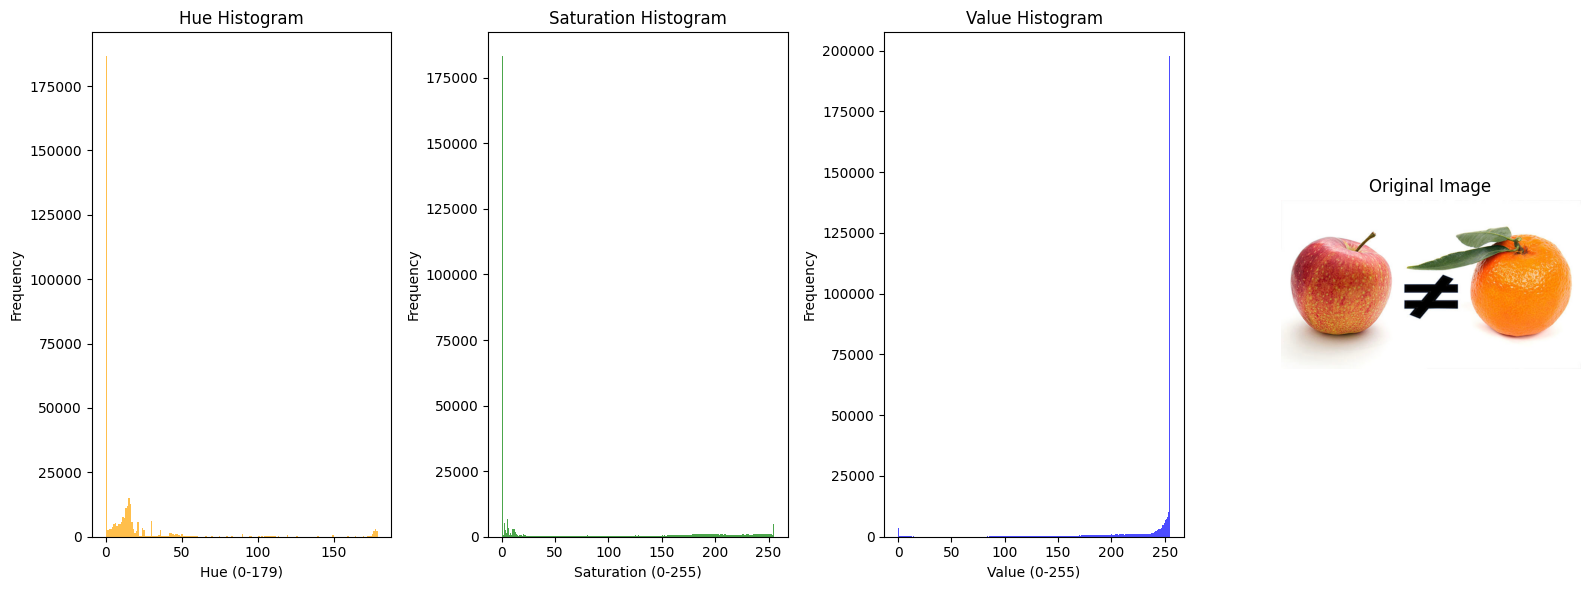

In [4]:
# potentially more code
plot_hsv_histogram('AppleOrange/AorO1.jpg')


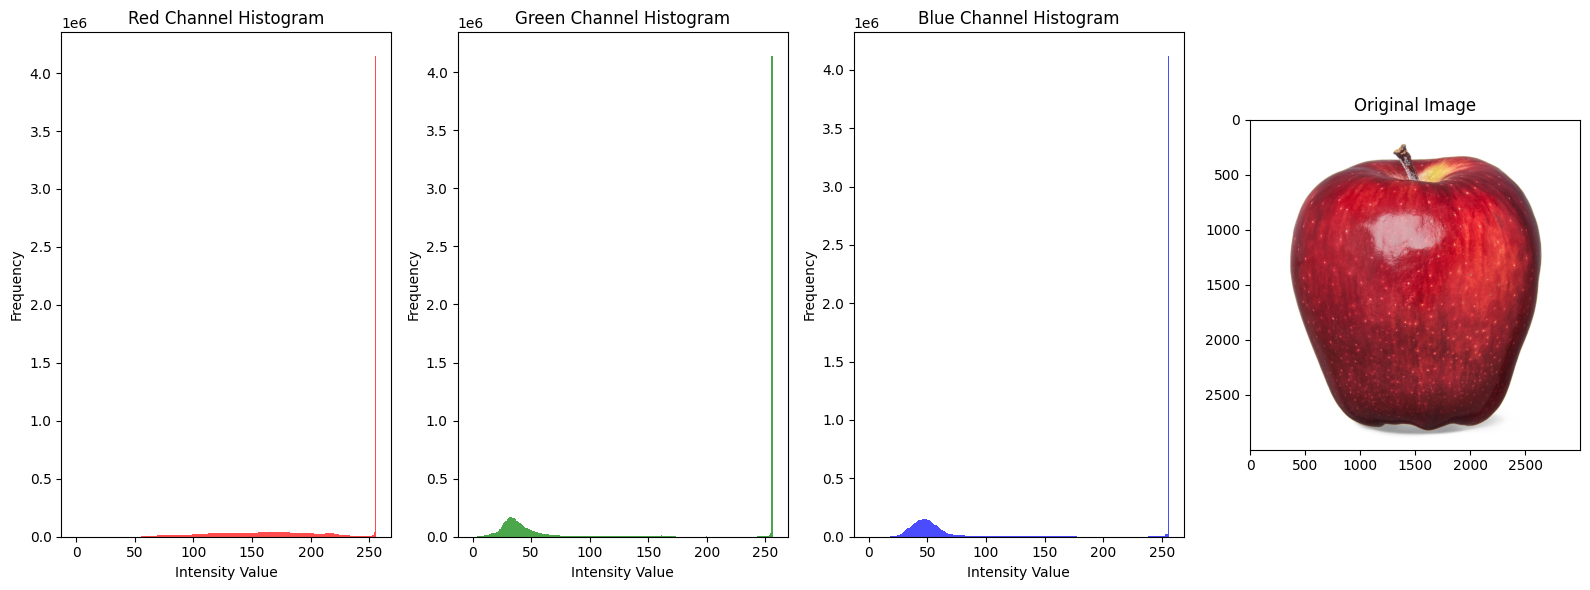

In [5]:
plot_RGB_histogram('apple.jpg')

## ```AorO()``` function

In [44]:
'''
You are to properly implement the following function so that
Apples become magenta, orange blue in color, and rest is blurred where blurring is visually detectable.

'''

def AorO(img):
    '''
    this function takes the path of an image, loads the image
    converts the color of apples to magenta, color of oranges to blue and blurs the rest
    you are to use some hand crafted thresholds here
    returns the modified image
    '''

    # Load image
    img_read = cv.imread(img)
    hsv_img = cv.cvtColor(img_read, cv.COLOR_BGR2HSV)

    # Define thresholds for apples and oranges in HSV
    apple_lower = np.array([2, 140, 50])    
    apple_upper = np.array([179, 240, 255])
    orange_lower = np.array([3, 150, 50])
    orange_upper = np.array([25, 250, 255])

    # Create masks for apples and oranges
    apple_mask = cv.inRange(hsv_img, apple_lower, apple_upper)
    orange_mask = cv.inRange(hsv_img, orange_lower, orange_upper)

    # Create magenta (apples) and blue (oranges)
    magenta = np.array([255, 0, 255], dtype=np.uint8)
    blue = np.array([255, 0, 0], dtype=np.uint8)

    # Apply colors
    result = img_read.copy()
    result[apple_mask > 0] = magenta
    result[orange_mask > 0] = blue

    # Blur the rest
    blur_mask = ~(apple_mask | orange_mask)
    blur = cv.GaussianBlur(img_read, (15, 15), 0)
    result[blur_mask > 0] = blur[blur_mask > 0]

    return result


In [43]:
cvranges = hsv_to_cv_ranges(26, 80.6, 97.3)
cvranges

(12, 205, 248)

In [8]:
# def AorO(img):
#     """
#     This function takes the path of an image, loads the image,
#     converts the color of apples to magenta, color of oranges to blue, and blurs the rest.
#     Uses RGB thresholds for segmentation.
#     Returns the modified image.
#     """
#     # Load the image
#     img_read = cv.imread(img)
#     #img_read = cv.cvtColor(img_read, cv.COLOR_BGR2RGB)  # Convert to RGB

#     # Define thresholds for apples and oranges in BGR
#     apple_lower = np.array([22, 23, 140])   # Example thresholds for apples
#     apple_upper = np.array([190, 150, 220])
#     orange_lower = np.array([3, 118, 180])  # Example thresholds for oranges
#     orange_upper = np.array([110, 197, 253])

#     # Create masks for apples and oranges
#     apple_mask = cv.inRange(img_read, apple_lower, apple_upper)
#     orange_mask = cv.inRange(img_read, orange_lower, orange_upper)

#     # Create magenta (apples) and blue (oranges)
#     magenta = np.array([255, 0, 255], dtype=np.uint8)
#     blue = np.array([255, 0, 0], dtype=np.uint8)

#     # Apply colors
#     result = img_read.copy()
#     result[apple_mask > 0] = magenta
#     result[orange_mask > 0] = blue

#     # Blur the rest
#     blur_mask = ~(apple_mask | orange_mask)
#     blur = cv.GaussianBlur(img_read, (15, 15), 0)
#     result[blur_mask > 0] = blur[blur_mask > 0]

#     return result

In [48]:
img_read =  cv.imread('AppleOrange/AorO5.jpg')
result_imageS = cv.resize(img_read, (960, 540))

cv.imshow('img_read', result_imageS)
cv.waitKey(0)
cv.destroyAllWindows()

In [45]:
result_image = AorO('AppleOrange/AorO7.jpg')
result_imageS = cv.resize(result_image, (960, 540))
cv.imshow('Processed Image', result_imageS)
cv.waitKey(0)
cv.destroyAllWindows()

# Part II: Use some clustering methods to find thresholds automatically
Assuming that there are apples and oranges in the image, analyze the colors in the image (such as histograms, or anything else you find fit), run some clustering algorithms on them and generate the image.

### Add explanations of what you do and why regarding the code(s) below

In [11]:
# your prep code

In [12]:
# potentially more code

## ```AorO2()``` function

In [63]:
'''
You are to properly implement the following function so that
Apples become magenta, orange blue in color, and rest is blurred where blurring is visually detectable.

'''
def AorO2(img_path):
    """
    This function applies a two-stage thresholding approach to segment apples and oranges
    from the background. Apples are converted to magenta, oranges to blue, and the rest is blurred.

    Args:
        img_path (str): Path to the input image.

    Returns:
        result (ndarray): The modified image with segmentation applied.
    """
    # Load image
    img_read = cv.imread(img_path)
    if img_read is None:
        raise ValueError(f"Image at path '{img_path}' could not be loaded.")

    # Convert to HSV color space
    hsv_img = cv.cvtColor(img_read, cv.COLOR_BGR2HSV)
    h, s, v = cv.split(hsv_img)

    # Stage 1: Global Thresholding (Suppress Background)
    global_hue_lower, global_hue_upper = 0, 180  # Consider all hues
    global_saturation_lower, global_saturation_upper = 50, 255  # Suppress low-saturation areas

    global_mask = cv.inRange(hsv_img, 
                             (global_hue_lower, global_saturation_lower, 0),
                             (global_hue_upper, global_saturation_upper, 255))

    # Apply global mask to filter the HSV image
    hsv_filtered = cv.bitwise_and(hsv_img, hsv_img, mask=global_mask)

    # Stage 2: Local Thresholding (Refine Foreground)
    # Use Otsu's method on the saturation channel of the filtered image
    _, local_thresh_saturation = cv.threshold(hsv_filtered[:, :, 1], 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

    # Combine masks
    combined_mask = cv.bitwise_and(global_mask, local_thresh_saturation)

    # Apply the combined mask
    segmented_hsv = cv.bitwise_and(hsv_img, hsv_img, mask=combined_mask)

    # Identify clusters: Apples (red hues) and Oranges (orange hues)
    apple_lower = np.array([0, 30, 50])    
    apple_upper = np.array([14, 255, 255])
    orange_lower = np.array([14, 30, 50])
    orange_upper = np.array([24, 255, 255])

    apple_mask = cv.inRange(segmented_hsv, apple_lower, apple_upper)
    orange_mask = cv.inRange(segmented_hsv, orange_lower, orange_upper)

    # Create magenta (apples) and blue (oranges) in BGR
    magenta = np.array([255, 0, 255], dtype=np.uint8)
    blue = np.array([255, 0, 0], dtype=np.uint8)

    # Initialize result
    result = img_read.copy()

    # Apply colors
    result[apple_mask > 0] = magenta
    result[orange_mask > 0] = blue

    # Create blur mask (areas not identified as apple or orange)
    blur_mask = cv.bitwise_not(cv.bitwise_or(apple_mask, orange_mask))

    # Apply blur to remaining regions
    blur = cv.GaussianBlur(img_read, (31, 31), 0)
    result[blur_mask > 0] = blur[blur_mask > 0]

    return result

In [71]:
result_image = AorO2("AppleOrange/AorO12.jpg")
result_imageS = cv.resize(result_image, (960, 540))
cv.imwrite("segmented_image.jpg", result_image)
cv.imshow("Result", result_imageS)
cv.waitKey(0)
cv.destroyAllWindows()

# My test will be performed below
Using my own code either at the end of this file or separately on my computer, I will just call the  ```AorO()``` or ```AorO2() functions in different ways and enjoy the outcomes :)